In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.decomposition import PCA

C:\Users\olive\AppData\Roaming\Python\Python38\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("Speeddating_Processed.csv")
df = df.drop(["Unnamed: 0", "has_null", "wave", "interests_correlate", "guess_prob_liked", "decision", "decision_o", "met"], axis=1)
df = df.drop([col for col in df if col.startswith("d_")], axis=1)
df = df.drop([col for col in df if "_o" in col], axis=1)

for ind, row in df.iterrows():
    if row["gender"] == "female":
        df.loc[ind, "gender"] = 1
    elif row["gender"] == "male":
        df.loc[ind, "gender"] = 0

df = df.join(pd.get_dummies(df.pop("race"), dtype=int))
df = df.join(pd.get_dummies(df.pop("field"), dtype=int))

df.head()

,gender,age,samerace,importance_same_race,importance_same_religion,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,expected_happy_with_sd_people,like,match,Asian/Pacific Islander/Asian-American,Black/African American,European/Caucasian-American,Latino/Hispanic American,Other,Acting,African-American Studies/History,American Studies,American Studies [Masters],Anthropology/Education,Applied Maths/Econs,Applied Physiology & Nutrition,Architecture,Art Education,Art History,Art History/medicine,Arts Administration,BUSINESS CONSULTING,Bilingual Education,Biochemistry,Biochemistry & Molecular Biophysics,Biology,Biology PhD,Biomedical Engineering,Biomedical Informatics,Biomedical engineering,Biotechnology,Business,Business & International Affairs,Business Administration,Business School,Business [Finance & Marketing],Business [MBA],Business and International Affairs [MBA/MIA Dual Degree],Business- MBA,Business/ Finance/ Real Estate,Business/Law,Business; Media,Business; marketing,Cell Biology,Chemistry,Classics,Climate Dynamics,Climate-Earth and Environ. Science,Clinical Psychology,Cognitive Studies in Education,Communications,Communications in Education,Comparative Literature,Computational Biochemsistry,Computer Science,Conservation biology,Consulting,Counseling Psychology,Creative Writing,Creative Writing - Nonfiction,Creative Writing [Nonfiction],Curriculum and Teaching/Giftedness,EDUCATION,ELECTRICAL ENGINEERING,Early Childhood Education,Earth and Environmental Science,Ecology,Economics,Economics and Political Science,Economics; English,Economics; Sociology,Ed.D. in higher education policy at TC,Education,Education Administration,Education Leadership - Public School Administration,Education Policy,Education- Literacy Specialist,Educational Psychology,Electrical Engg.,Electrical Engineering,Elementary Education,Elementary Education - Preservice,Elementary/Childhood Education [MA],Engineering,English,English Education,English and Comp Lit,Environmental Engineering,Epidemiology,Film,Finanace,Finance,Finance&Economics,Finance/Economics,Financial Engineering,Fundraising Management,GS Postbacc PreMed,GSAS,General management/finance,Genetics,Genetics & Development,German Literature,Health policy,Higher Ed. - M.A.,History,History [GSAS - PhD],History of Religion,Human Rights,Human Rights: Middle East,Industrial Engineering,Industrial Engineering/Operations Research,Instructional Media and Technology,Instructional Tech & Media,Intellectual Property Law,International Affairs,International Affairs - Economic Policy,International Affairs and Public Health,International Affairs/Business,International Affairs/Finance,International Business,International Development,International Educational Development,International Finance; Economic Policy,International Politics,International Relations,International Security Policy - SIPA,International affairs,Intrernational Affairs,Japanese Literature,Journalism,LAW,Law,Law and English Literature [J.D./Ph.D.],Law and Social Work,Law/Business,MA Biotechnology,MA Science Education,MA Teaching Social Studies,MA in Quantitative Methods,MBA,MBA - Private Equity / Real Estate,MBA / Master of International Affairs [SIPA],MBA Finance,MFA Poetry,MFA -Film,MFA Acting Program,MFA Creative Writing,MFA Writing,Marketing,Master in Public Administration,Master of International Affairs,Masters in Public Administration,Masters of Industrial Engineering,Masters of Social Work,Masters of Social Work&Education,Math,Mathematical Finance,Mathematics,Mathematics; PhD,Mechanical Engineering,Medical Informatics,Medicine,Microbiology,Modern Chinese Literature,Molecular Biology,Museum Anthropology,Music Education,Neurobiology,N

In [7]:
binaryCols = []
for col in df.columns:
    if {0, 1}.issuperset(df[col]):
        binaryCols.append(col)
binaryCols

['gender',
 'samerace',
 'match',
 'Asian/Pacific Islander/Asian-American',
 'Black/African American',
 'European/Caucasian-American',
 'Latino/Hispanic American',
 'Other',
 'Acting',
 'African-American Studies/History',
 'American Studies',
 'American Studies [Masters]',
 'Anthropology/Education',
 'Applied Maths/Econs',
 'Applied Physiology & Nutrition',
 'Architecture',
 'Art Education',
 'Art History',
 'Art History/medicine',
 'Arts Administration',
 'BUSINESS CONSULTING',
 'Bilingual Education',
 'Biochemistry',
 'Biochemistry & Molecular Biophysics',
 'Biology',
 'Biology PhD',
 'Biomedical Engineering',
 'Biomedical Informatics',
 'Biomedical engineering',
 'Biotechnology',
 'Business',
 'Business & International Affairs',
 'Business Administration',
 'Business School',
 'Business [Finance & Marketing]',
 'Business [MBA]',
 'Business and International Affairs [MBA/MIA Dual Degree]',
 'Business- MBA',
 'Business/ Finance/ Real Estate',
 'Business/Law',
 'Business; Media',
 'Bus

In [8]:
tempDF = df.drop(binaryCols, axis=1)

scaler = StandardScaler()
scaled_arr = scaler.fit_transform(tempDF)
scaled_df = pd.DataFrame(scaled_arr, index=tempDF.index, columns=tempDF.columns).join(df.loc[:,binaryCols])
scaled_df

,age,importance_same_race,importance_same_religion,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,expected_happy_with_sd_people,like,gender,samerace,match,Asian/Pacific Islander/Asian-American,Black/African American,European/Caucasian-American,Latino/Hispanic American,Other,Acting,African-American Studies/History,American Studies,American Studies [Masters],Anthropology/Education,Applied Maths/Econs,Applied Physiology & Nutrition,Architecture,Art Education,Art History,Art History/medicine,Arts Administration,BUSINESS CONSULTING,Bilingual Education,Biochemistry,Biochemistry & Molecular Biophysics,Biology,Biology PhD,Biomedical Engineering,Biomedical Informatics,Biomedical engineering,Biotechnology,Business,Business & International Affairs,Business Administration,Business School,Business [Finance & Marketing],Business [MBA],Business and International Affairs [MBA/MIA Dual Degree],Business- MBA,Business/ Finance/ Real Estate,Business/Law,Business; Media,Business; marketing,Cell Biology,Chemistry,Classics,Climate Dynamics,Climate-Earth and Environ. Science,Clinical Psychology,Cognitive Studies in Education,Communications,Communications in Education,Comparative Literature,Computational Biochemsistry,Computer Science,Conservation biology,Consulting,Counseling Psychology,Creative Writing,Creative Writing - Nonfiction,Creative Writing [Nonfiction],Curriculum and Teaching/Giftedness,EDUCATION,ELECTRICAL ENGINEERING,Early Childhood Education,Earth and Environmental Science,Ecology,Economics,Economics and Political Science,Economics; English,Economics; Sociology,Ed.D. in higher education policy at TC,Education,Education Administration,Education Leadership - Public School Administration,Education Policy,Education- Literacy Specialist,Educational Psychology,Electrical Engg.,Electrical Engineering,Elementary Education,Elementary Education - Preservice,Elementary/Childhood Education [MA],Engineering,English,English Education,English and Comp Lit,Environmental Engineering,Epidemiology,Film,Finanace,Finance,Finance&Economics,Finance/Economics,Financial Engineering,Fundraising Management,GS Postbacc PreMed,GSAS,General management/finance,Genetics,Genetics & Development,German Literature,Health policy,Higher Ed. - M.A.,History,History [GSAS - PhD],History of Religion,Human Rights,Human Rights: Middle East,Industrial Engineering,Industrial Engineering/Operations Research,Instructional Media and Technology,Instructional Tech & Media,Intellectual Property Law,International Affairs,International Affairs - Economic Policy,International Affairs and Public Health,International Affairs/Business,International Affairs/Finance,International Business,International Development,International Educational Development,International Finance; Economic Policy,International Politics,International Relations,International Security Policy - SIPA,International affairs,Intrernational Affairs,Japanese Literature,Journalism,LAW,Law,Law and English Literature [J.D./Ph.D.],Law and Social Work,Law/Business,MA Biotechnology,MA Science Education,MA Teaching Social Studies,MA in Quantitative Methods,MBA,MBA - Private Equity / Real Estate,MBA / Master of International Affairs [SIPA],MBA Finance,MFA Poetry,MFA -Film,MFA Acting Program,MFA Creative Writing,MFA Writing,Marketing,Master in Public Administration,Master of International Affairs,Masters in Public Administration,Masters of Industrial Engineering,Masters of Social Work,Masters of Social Work&Education,Math,Mathematical Finance,Mathematics,Mathematics; PhD,Mechanical Engineering,Medical Informatics,Medicine,Microbiology,Modern Chinese Literature,Molecular Biology,Museum Anthropology,Music Education,Neurobiology,N

In [9]:
def plotPCA(df, target, binary=False, s=5):
    features = list(df.columns)
    features.remove(target)

    # n_components necessary to explain 80% of the variance
    pca = PCA()
    components = pca.fit_transform(df[features])

    PC1 = components[:,0]
    PC2 = components[:,1]

    zipped = list(zip(PC1,
                      PC2,
                      df[target]))

    pc_df = pd.DataFrame(zipped,
                         columns=['PC1',
                                  'PC2',
                                  target])

    fig, ax = plt.subplots(figsize=(12,7))

    if binary:
        sns.scatterplot(data=pc_df,
                        x="PC1",
                        y="PC2",
                        hue=target,
                        linewidth=0,
                        s=s)
    else:
        sns.scatterplot(data=pc_df,
                        x="PC1",
                        y="PC2",
                        hue=target,
                        linewidth=0,
                        s=5,
                        legend=False)


    plt.title(f"Speed Dating PCA\nExplained Variance: {pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]}",
              fontsize=16)
    plt.xlabel('First Principal Component',
               fontsize=16)
    plt.ylabel('Second Principal Component',
               fontsize=16)

    if not binary:
        norm = plt.Normalize(pc_df[target].min(), pc_df[target].max())
        cmap = sns.cubehelix_palette(n_colors=2, light=1, as_cmap=True)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])

        cax = fig.add_axes([ax.get_position().x1+0.05, ax.get_position().y0, 0.06, ax.get_position().height / 2])
        ax.figure.colorbar(sm, cax=cax)

    plt.show()

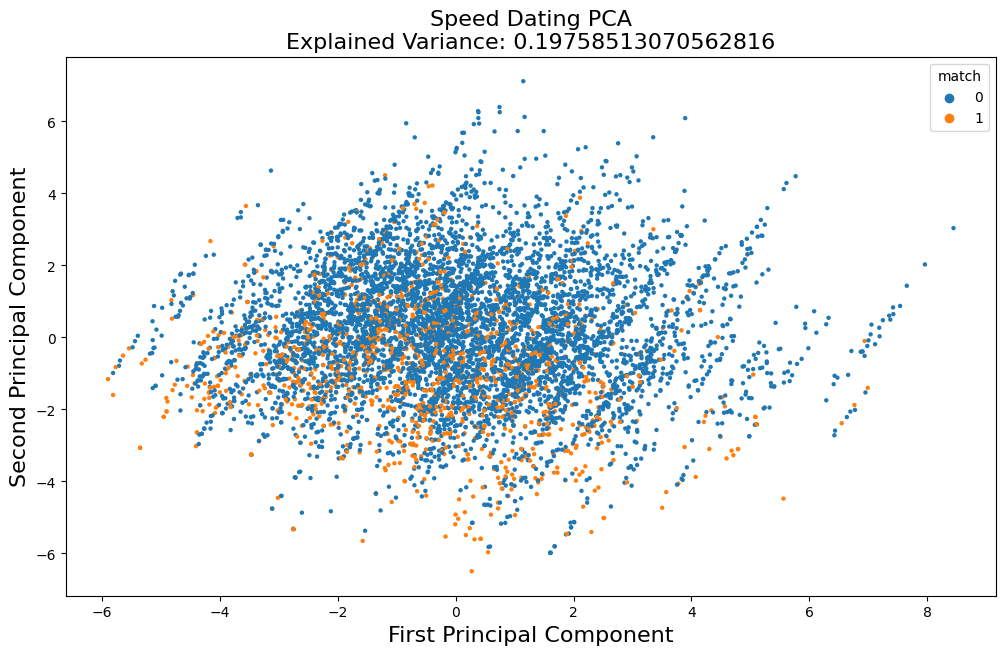

In [10]:
plotPCA(scaled_df, "match", binary=True, s=10)

In [11]:
def plotPairedPCA(df, target, n_components, n_shown, s=5):
    features = list(df.columns)
    features.remove(target)

    # n_components necessary to explain 80% of the variance
    pca = PCA(n_components=n_components)
    components = pca.fit_transform(df[features])

    print("Total Explained Variance: ", sum(pca.explained_variance_ratio_))


    PCs = []
    colNames = []
    for i in range(n_shown):
        PCs.append(components[:,i])
        colNames.append(f"PC{i+1}")

    zipped = list(zip(*PCs,
                      df[target]))

    pc_df = pd.DataFrame(zipped,
                         columns=[*colNames,
                                  target])

    g = sns.PairGrid(data=pc_df,
                    hue=target)
    g.map(sns.scatterplot, linewidth=0, s=s)

    expVar = 0
    for j in range(n_shown):
        expVar += pca.explained_variance_ratio_[j]

    plt.suptitle(f"Speed Dating PCA\nExplained Variance: {expVar}",
              fontsize=16)
    g.fig.subplots_adjust(top=0.9)
    g.add_legend()

    plt.show()

Total Explained Variance:  0.8612296284524465


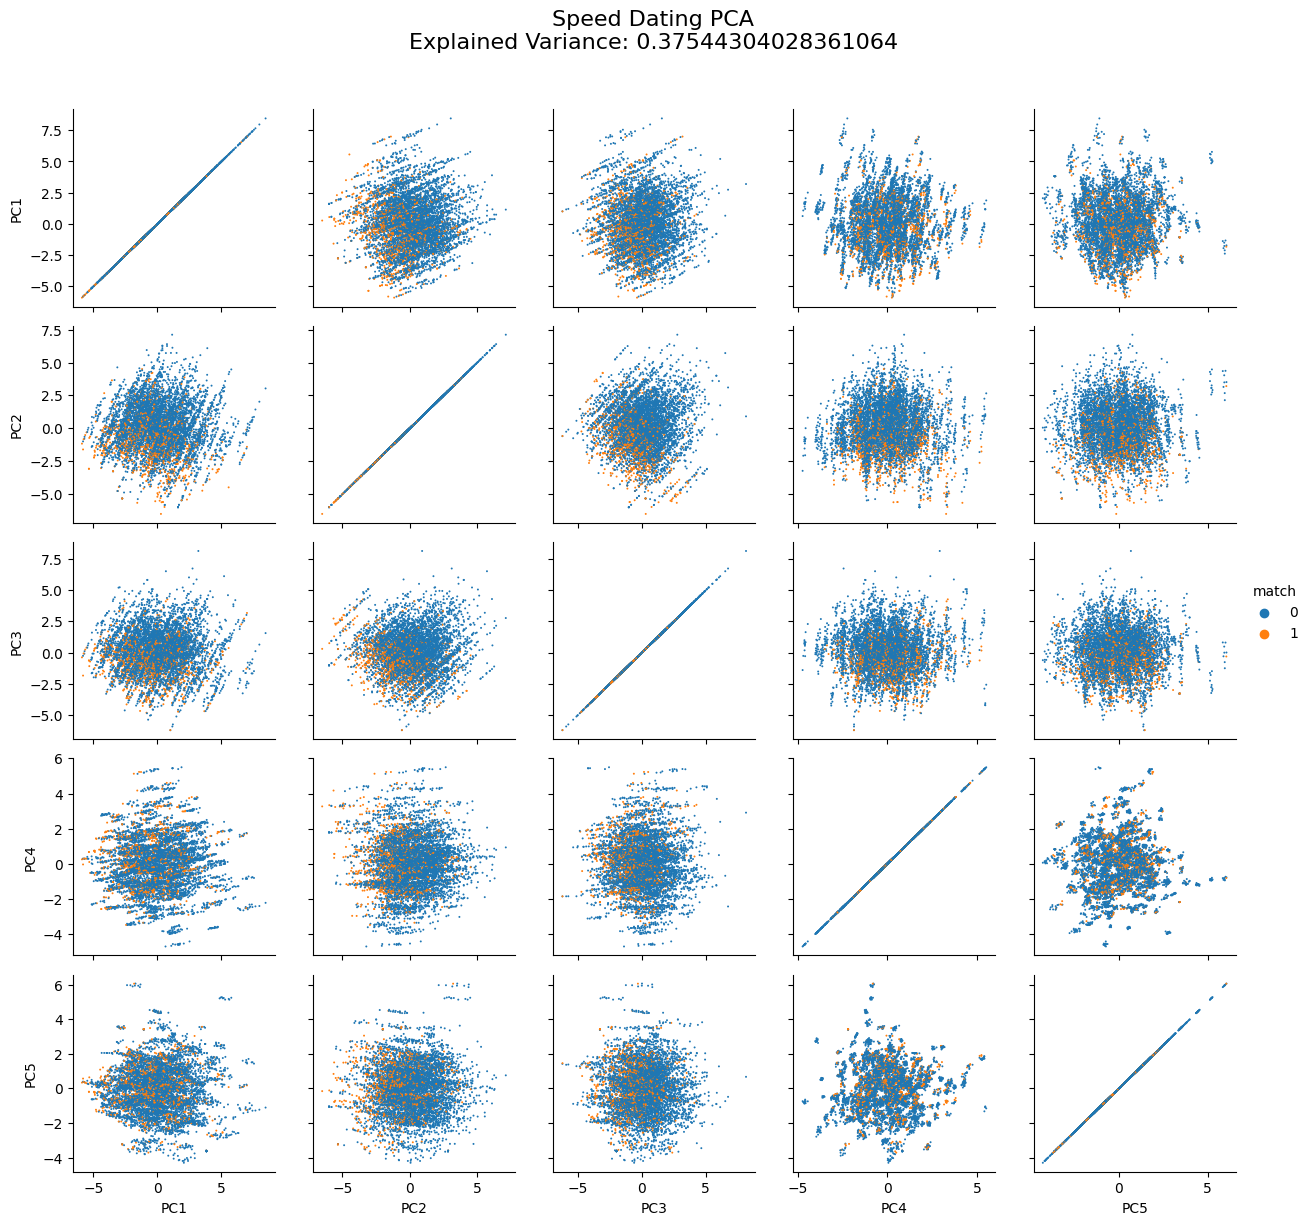

In [19]:
plotPairedPCA(scaled_df, "match", 25, 5, s=2)